# **Fruit and Vegetable Image Classification Project**

This project involves building and training a **Convolutional Neural Network (CNN)** model to classify images of fruits and vegetables. The dataset is divided into training, validation, and test sets. The goal is to preprocess the images, build the CNN model, train it, evaluate its performance, and visualize the results.

Dataset: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

## **Importing Necessary Libraries**

We will use **TensorFlow** for building and training the model, and **Matplotlib** for visualizing the training results.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **Loading Image Dataset for Training**

We use **TensorFlow's `image_dataset_from_directory`** to load and preprocess images from a directory.

In [3]:
data_train = tf.keras.utils.image_dataset_from_directory(
    "train",
    shuffle=True,
    image_size=(180, 180),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [4]:
data_cat = data_train.class_names

## **Loading Validation Dataset**

We use **TensorFlow's `image_dataset_from_directory`** to load and preprocess images for validation.

In [5]:
data_val = tf.keras.utils.image_dataset_from_directory(
    "validation",
    image_size=(180, 180),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


# **Loading Test Dataset**

We use **TensorFlow's `image_dataset_from_directory`** to load and preprocess images for testing.

In [6]:
data_test = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size=(180, 180),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


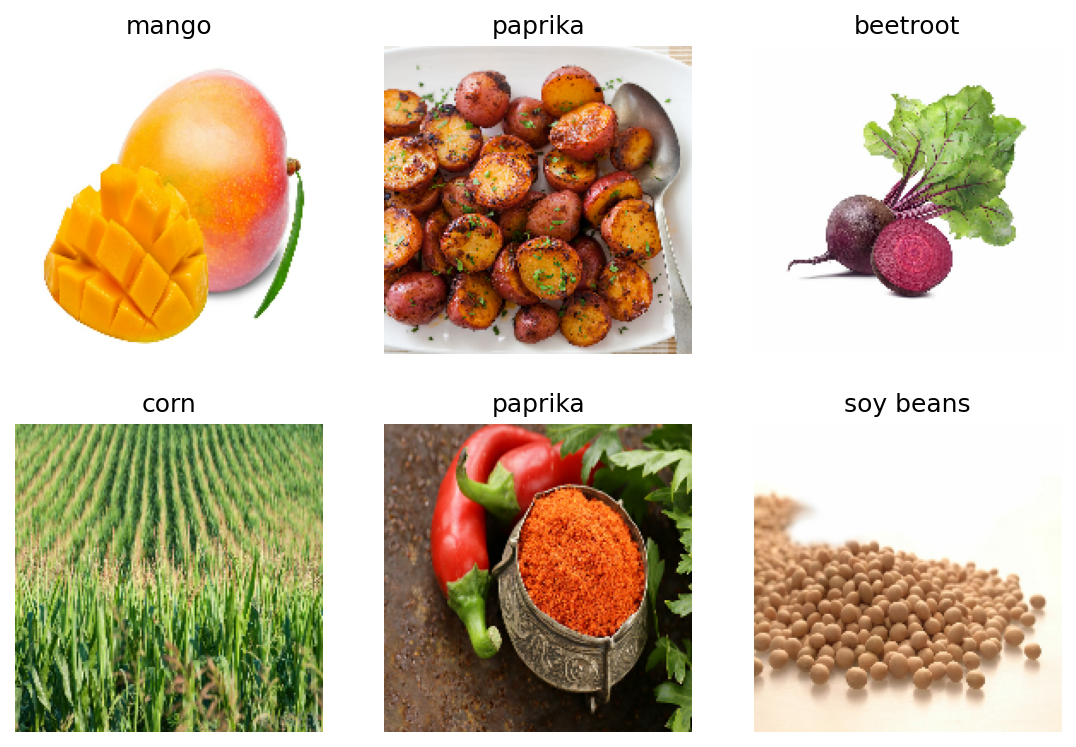

In [7]:
plt.figure(figsize=(9,6),dpi=150)
for image, labels in data_train.take(1):
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [8]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Convolutional Neural Network (CNN) Model

This model is designed for image classification, particularly for datasets like fruits and vegetables. It processes images through multiple convolutional layers and dense layers to extract features and make predictions.

In [9]:
model = Sequential()

In [10]:
model.add(layers.Rescaling(1./255))

In [11]:
model.add(layers.Conv2D(16, 3, padding="same", activation="relu"))
model.add(layers.MaxPooling2D())

In [12]:
model.add(layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(layers.MaxPooling2D())

In [13]:
model.add(layers.Conv2D(64, 3, padding="same", activation="relu"))
model.add(layers.MaxPooling2D())

In [14]:
model.add(layers.Flatten())

In [15]:
model.add(layers.Dropout(0.2))

In [16]:
model.add(layers.Dense(128))

In [17]:
model.add(layers.Dense(len(data_cat)))

In [18]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

## **Training the CNN Model**

After defining the model architecture, we train it using the **.fit()** function.

In [19]:
epochs=25
training_results = model.fit(data_train, validation_data=data_val, epochs=epochs, batch_size=32)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 326ms/step - accuracy: 0.0912 - loss: 3.4876 - val_accuracy: 0.3390 - val_loss: 2.2717
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.3135 - loss: 2.3407 - val_accuracy: 0.5385 - val_loss: 1.6648
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - accuracy: 0.4236 - loss: 1.9472 - val_accuracy: 0.7236 - val_loss: 1.1021
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.5587 - loss: 1.4921 - val_accuracy: 0.8091 - val_loss: 0.7570
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.6989 - loss: 1.0289 - val_accuracy: 0.8604 - val_loss: 0.5795
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 350ms/step - accuracy: 0.8277 - loss: 0.6653 - val_accuracy: 0.9060 - val_loss: 0.4430
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.8604 - loss: 0.4797 - val_accuracy: 0.9231 - val_loss: 0.4133
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 350ms/step - accuracy: 0.8693 - loss: 0.4457 - val_accu

## **Visualizing Model Performance**

After training the CNN model, we can analyze its performance using accuracy and loss curves.

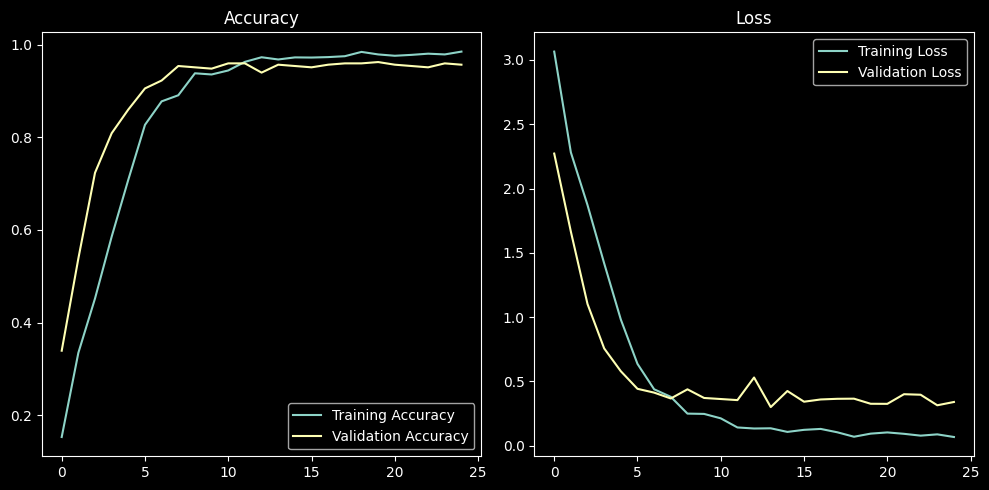

In [20]:
epochs_range = range(epochs)
plt.style.use("dark_background")
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, training_results.history["accuracy"], label="Training Accuracy")
plt.plot(epochs_range, training_results.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, training_results.history["loss"], label="Training Loss")
plt.plot(epochs_range, training_results.history["val_loss"], label="Validation Loss")
plt.title("Loss")

plt.tight_layout()
plt.legend()

## **Image Prediction and Class Probability**

In this section, we load an image, preprocess it, and use the trained model to predict its class. We also calculate the probability of the predicted class and display the result.

In [33]:
image = "test/spinach/Image_4.jpg"
image = tf.keras.utils.load_img(image, target_size=(180, 180))
image = tf.keras.utils.array_to_img(image)
image = tf.expand_dims(image, 0)

In [34]:
predict = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [35]:
score = tf.nn.softmax(predict)

In [36]:
print("Image: {} | Accuracy: {:0.2f}%".format(data_cat[np.argmax(score)], np.max(score)*100))

Image: spinach | Accuracy: 99.60%


## **Conclusion**

In this project, we built and trained a Convolutional Neural Network (CNN) model to classify images of fruits and vegetables. The project workflow was as follows:

1. **Dataset Preparation**:
   - We utilized a labeled dataset of fruits and vegetables, which was split into training, validation, and test sets. 
   - The images were preprocessed by resizing them to the target size (180x180), ensuring consistency in input dimensions for the model.

2. **Model Architecture**:
   - The model was built using a Sequential API in TensorFlow with several convolutional layers followed by max-pooling layers to extract features from the images.
   - A Flatten layer was used to convert the 2D feature maps into 1D, and dropout was applied for regularization to prevent overfitting.
   - Finally, the output layer was a Dense layer with the number of units equal to the number of classes (fruits/vegetables), applying a softmax activation function to predict the class probabilities.

3. **Training**:
   - The model was trained using the `fit()` method on the training data for 25 epochs, with a batch size of 32. 
   - We used the validation dataset during training to monitor the model’s performance and ensure generalization.

4. **Evaluation**:
   - After training, the model's performance was evaluated based on accuracy and loss curves, showing how the model learned over time.
   - We used metrics such as accuracy and loss to assess both training and validation performance.

5. **Prediction**:
   - The model was able to successfully predict the class of new images of fruits and vegetables by converting them into the appropriate format and using the trained model to obtain class probabilities.


### **Key Takeaways**:
- This project highlights the power of deep learning, particularly Convolutional Neural Networks (CNNs), in image classification tasks.
- The model was able to effectively classify various types of fruits and vegetables with high accuracy.
- Future improvements could involve experimenting with more advanced techniques like data augmentation or fine-tuning the model for better accuracy.
- This project provides a foundational understanding of how image classification works and can be applied to real-world scenarios in fields like agriculture, food recognition, and even health and safety applications.

Overall, this project demonstrates the process of developing a robust image classification model using TensorFlow and Keras, from data preprocessing to model evaluation and deployment.
